# Section_5 如何对不同选股方案进行组合(股票多策略)？

### 读取选股结果

In [1]:
import pandas as pd

strategy1 = pd.read_excel('divert_opt_quantile_5.xlsx').set_index("trade_date")
strategy2 = pd.read_excel('equal_weight_quantile_5.xlsx').set_index("trade_date")

strategy1.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
20140106,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20140107,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20140108,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20140109,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 为不同的选股方案设置不同的权重偏好，从而控制组合选股结果。以下以等权取交并集为例

In [2]:
import numpy as np

combined_result = 1*strategy1.replace(np.nan,0)+1*strategy2.replace(np.nan,0)

### 取交集

In [3]:
Intersection = combined_result[combined_result==2].fillna(0).replace(2,1)
Intersection.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 取并集

In [4]:
Union = combined_result[combined_result>0].fillna(0)
Union[Union>0] = 1
Union.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 测试策略组合效果

In [5]:
from jaqs.data import DataView 
import warnings
import numpy as np

warnings.filterwarnings("ignore")
dataview_folder = '../../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == u'停牌'
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

Dataview loaded successfully.


In [6]:
dv.append_df(field_name="Union",df=Union,is_quarterly=False)
dv.append_df(field_name="Intersection",df=Intersection,is_quarterly=False)

In [7]:
from jaqs.research import SignalDigger
import matplotlib.pyplot as plt
from jaqs.research.signaldigger.analysis import analysis

obj = SignalDigger(output_folder='./output',
                   output_format='pdf')

def draw_analysis(signal="Union",benchmark_price=None):
    obj.process_signal_before_analysis(signal=dv.get_ts(signal),
                                       price=dv.get_ts("close_adj"),
                                       high=dv.get_ts("high_adj"), # 可为空
                                       low=dv.get_ts("low_adj"),# 可为空
                                       n_quantiles=1,# quantile分类数
                                       mask=mask,# 过滤条件
                                       can_enter=can_enter,# 是否能进场
                                       can_exit=can_exit,# 是否能出场
                                       period=30,# 持有期
                                       benchmark_price=benchmark_price, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                       commission = 0.0008,
                                       )
    print(analysis(obj.signal_data,is_event=True,period=30))
    obj.create_full_report()
    plt.show()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret
t-stat        29.614489       14.594476
p-value        0.000000        0.000000
skewness       1.932366       -0.383468
kurtosis      13.558893        9.483636
Ann. Ret       0.095026        0.089408
Ann. Vol       0.294181        0.065210
Ann. IR        0.323020        1.371079
occurance  67803.000000      915.000000, 'space':                     long_space
Ann. Up_sp Ret        1.018738
Ann. Up_sp Vol        0.399904
Ann. Up_sp IR         2.547456
Up_sp Pct5            0.000000
Up_sp Pct25           0.035617
Up_sp Pct50           0.086297
Up_sp Pct75           0.167367
Up_sp Pct95           0.390417
Up_sp Occur       67803.000000
Ann. Down_sp Ret     -0.575221
Ann. Down_sp Vol      0.238096
Ann. Down_sp IR      -2.415924
Down_sp Pct5         -0.256385
Down_sp Pct25        -0.090583
Down_sp Pct50        -0.044062
Down_sp Pct75        -0.017193
Down_sp Pct95        -0

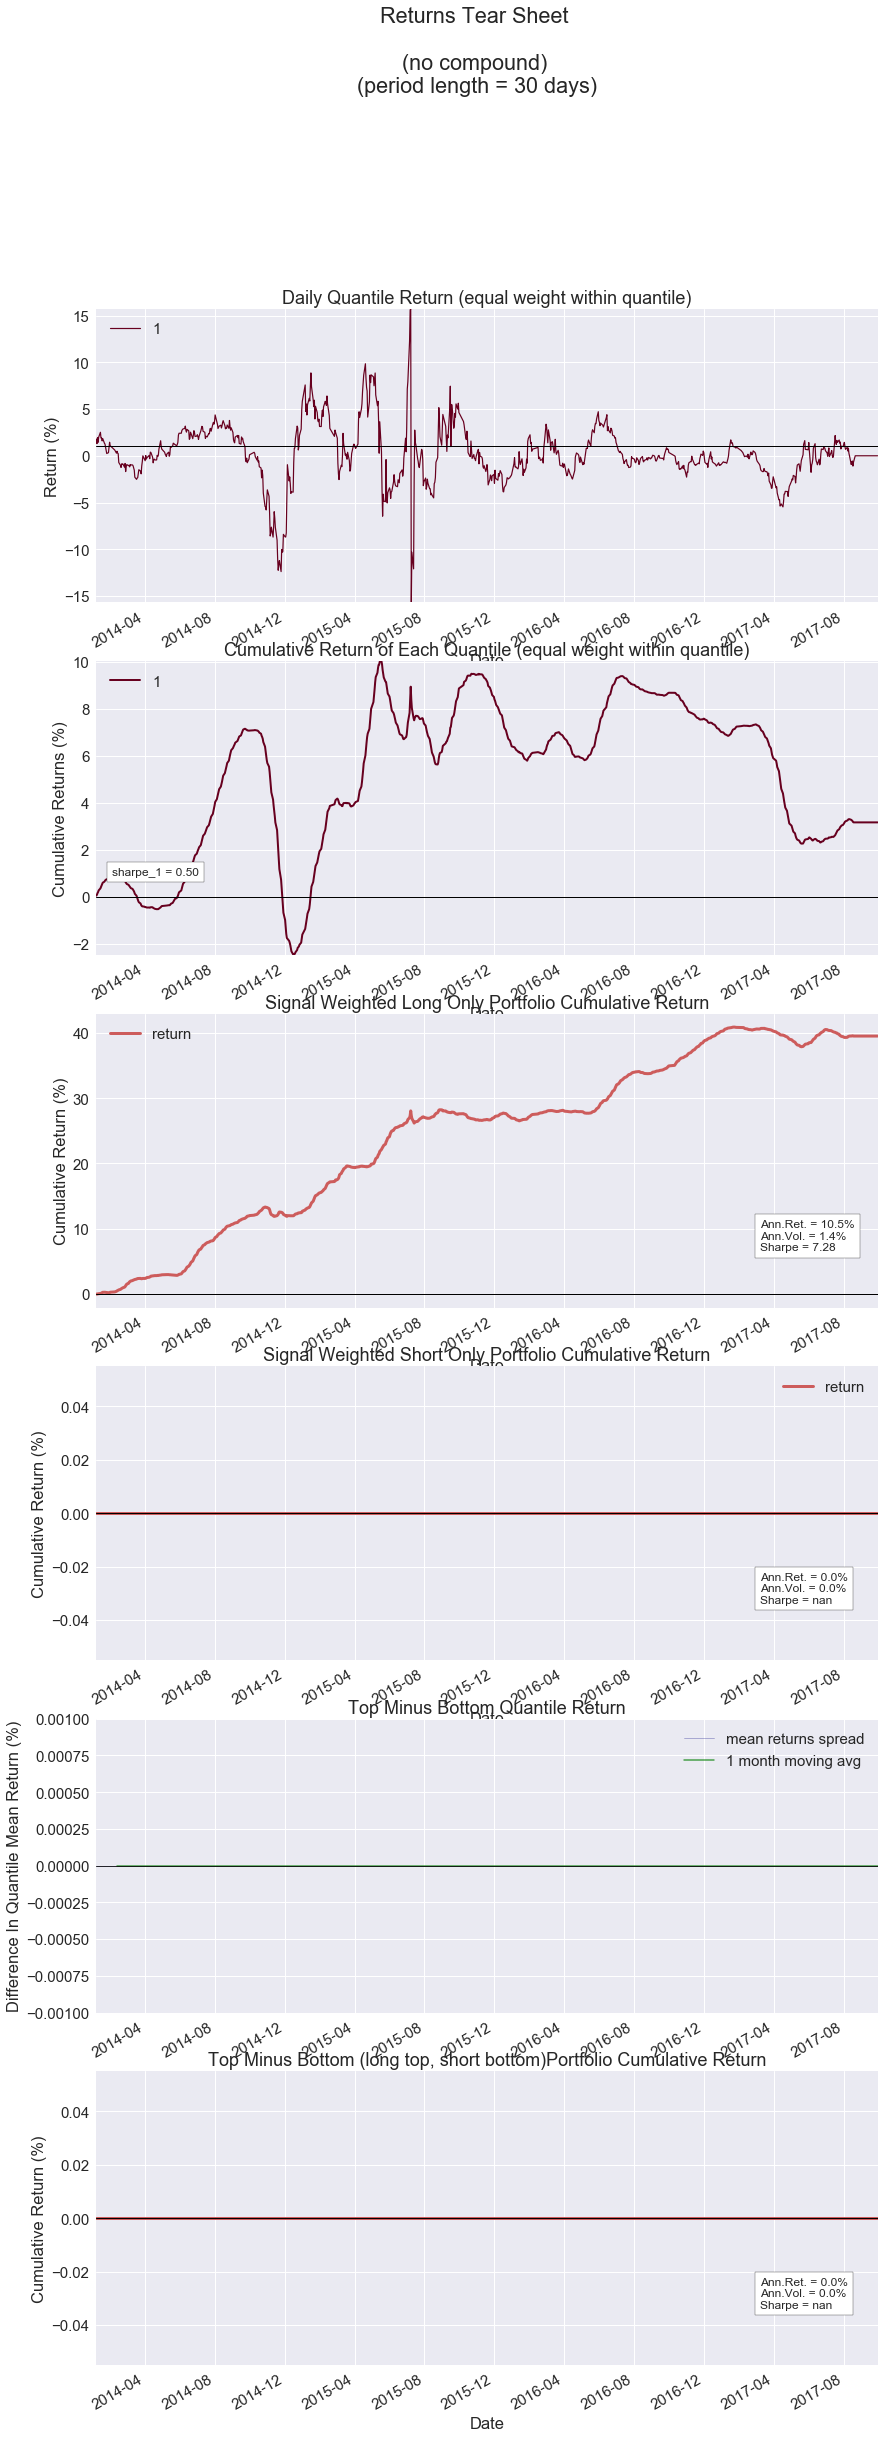

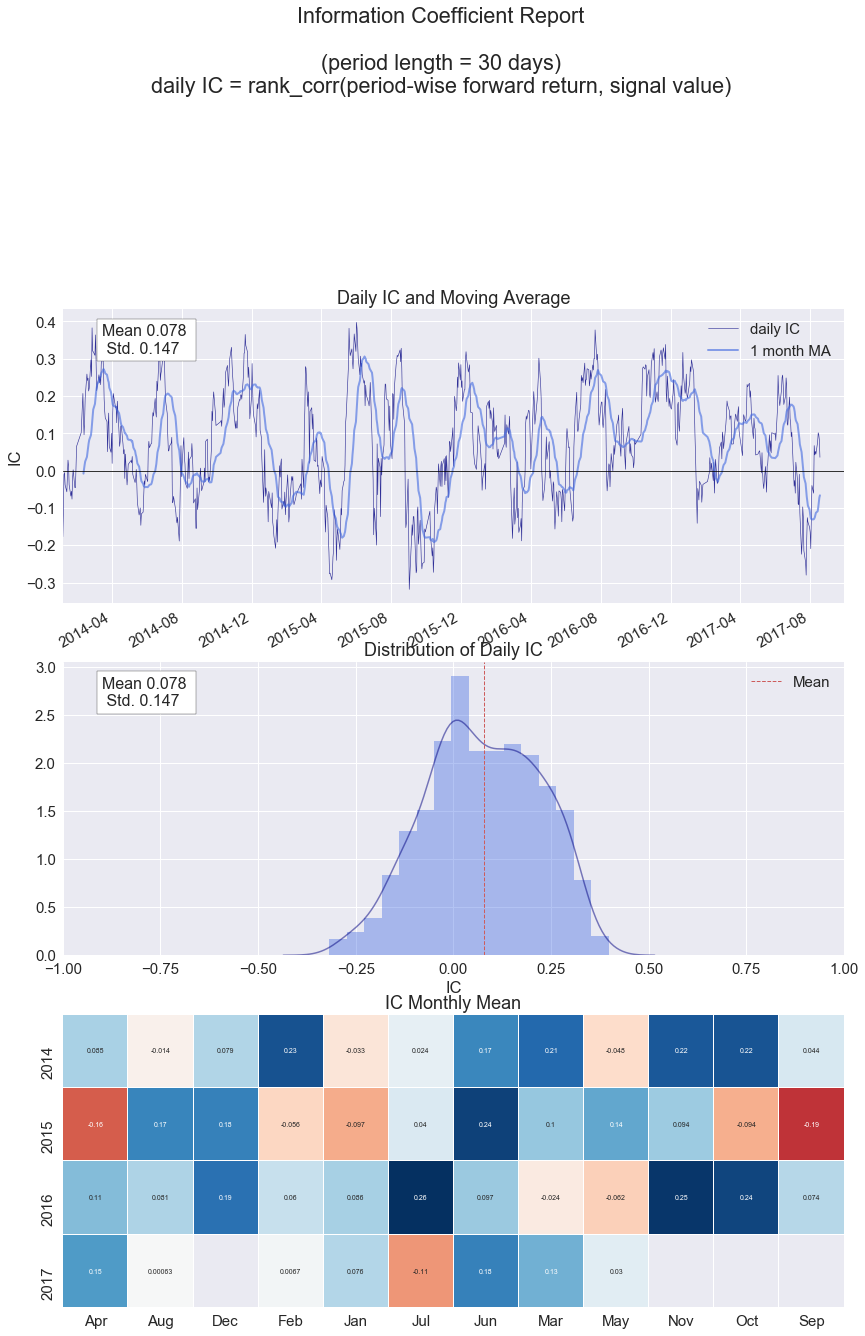

In [8]:
# 并集绩效 相对收益
draw_analysis('Union',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret
t-stat        64.566360        9.532299
p-value        0.000000        0.000000
skewness       1.517171        0.363830
kurtosis       8.845563        2.235644
Ann. Ret       0.292872        0.274866
Ann. Vol       0.415858        0.306937
Ann. IR        0.704259        0.895512
occurance  67803.000000      915.000000, 'space':                     long_space
Ann. Up_sp Ret        1.018738
Ann. Up_sp Vol        0.399904
Ann. Up_sp IR         2.547456
Up_sp Pct5            0.000000
Up_sp Pct25           0.035617
Up_sp Pct50           0.086297
Up_sp Pct75           0.167367
Up_sp Pct95           0.390417
Up_sp Occur       67803.000000
Ann. Down_sp Ret     -0.575221
Ann. Down_sp Vol      0.238096
Ann. Down_sp IR      -2.415924
Down_sp Pct5         -0.256385
Down_sp Pct25        -0.090583
Down_sp Pct50        -0.044062
Down_sp Pct75        -0.017193
Down_sp Pct95        -0

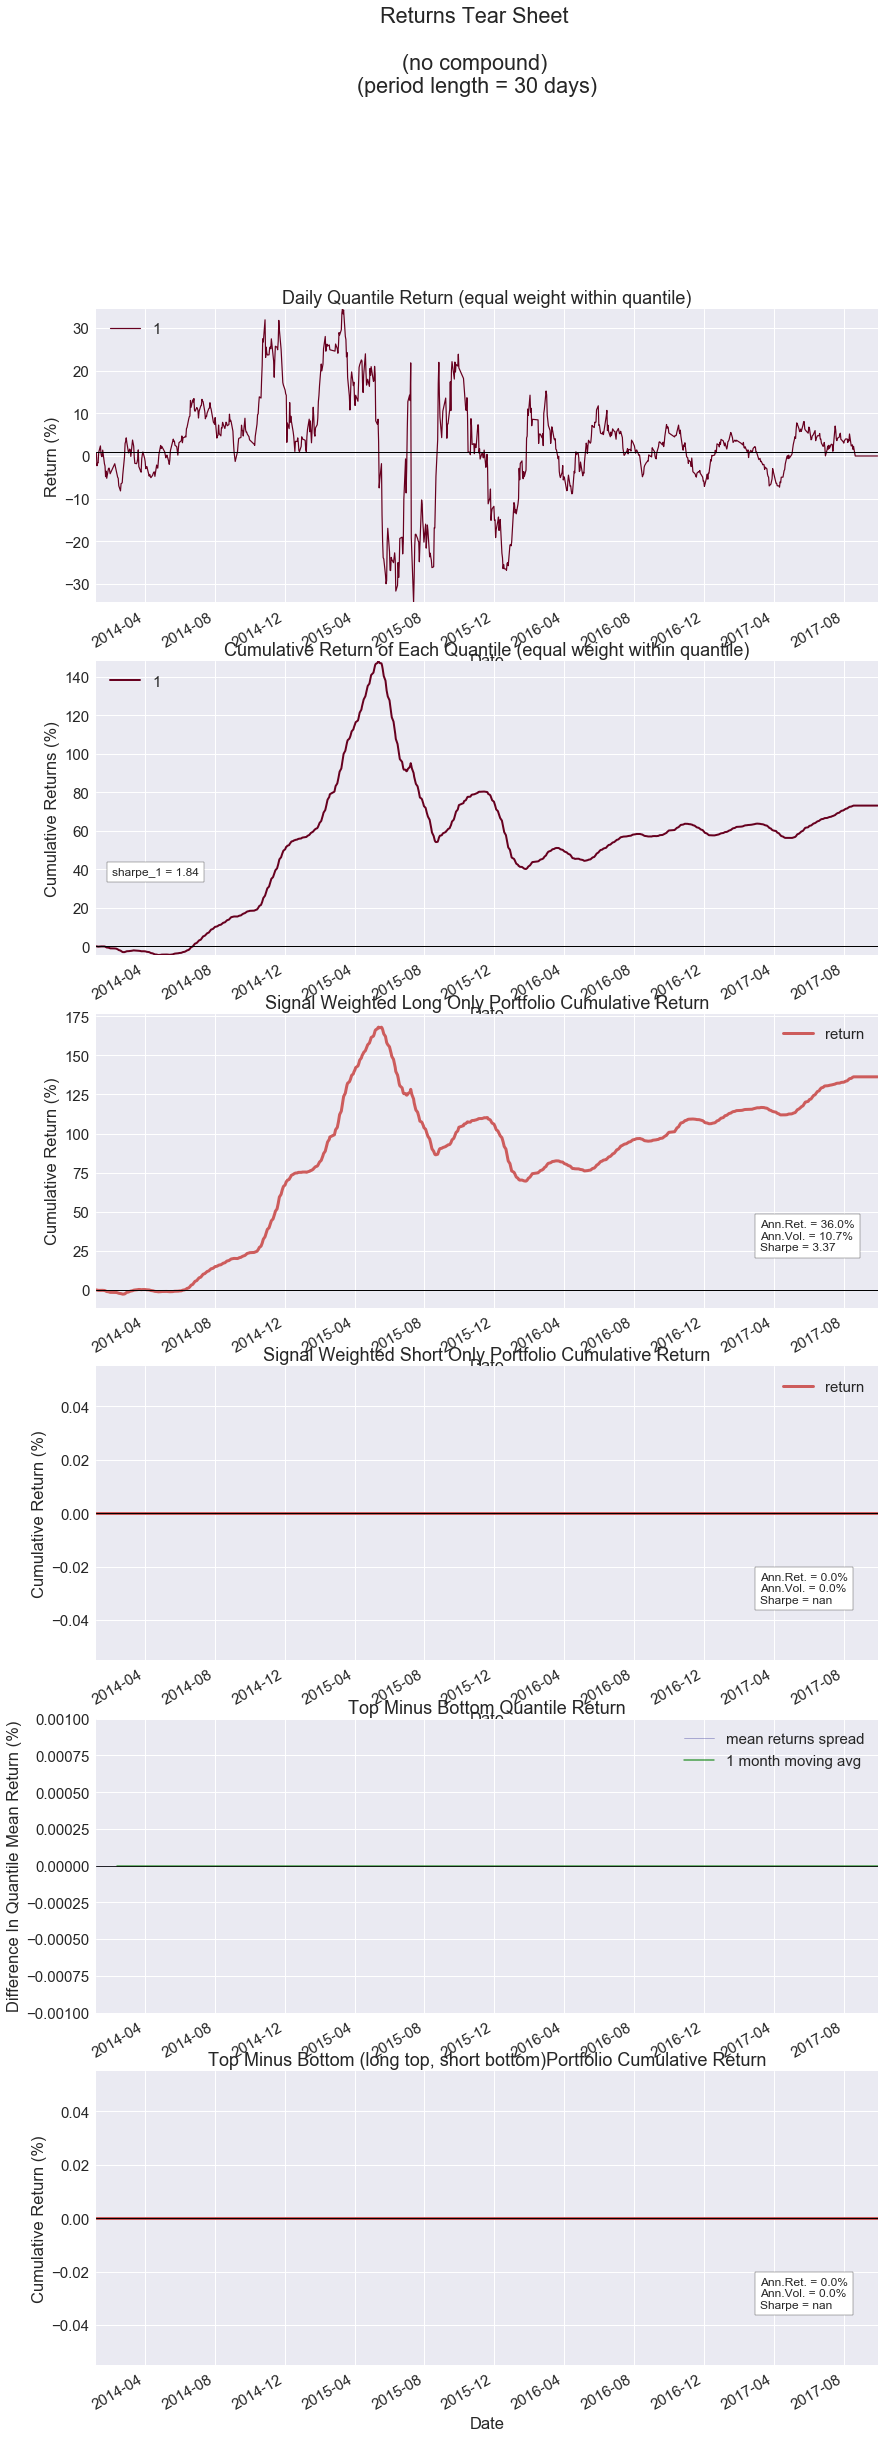

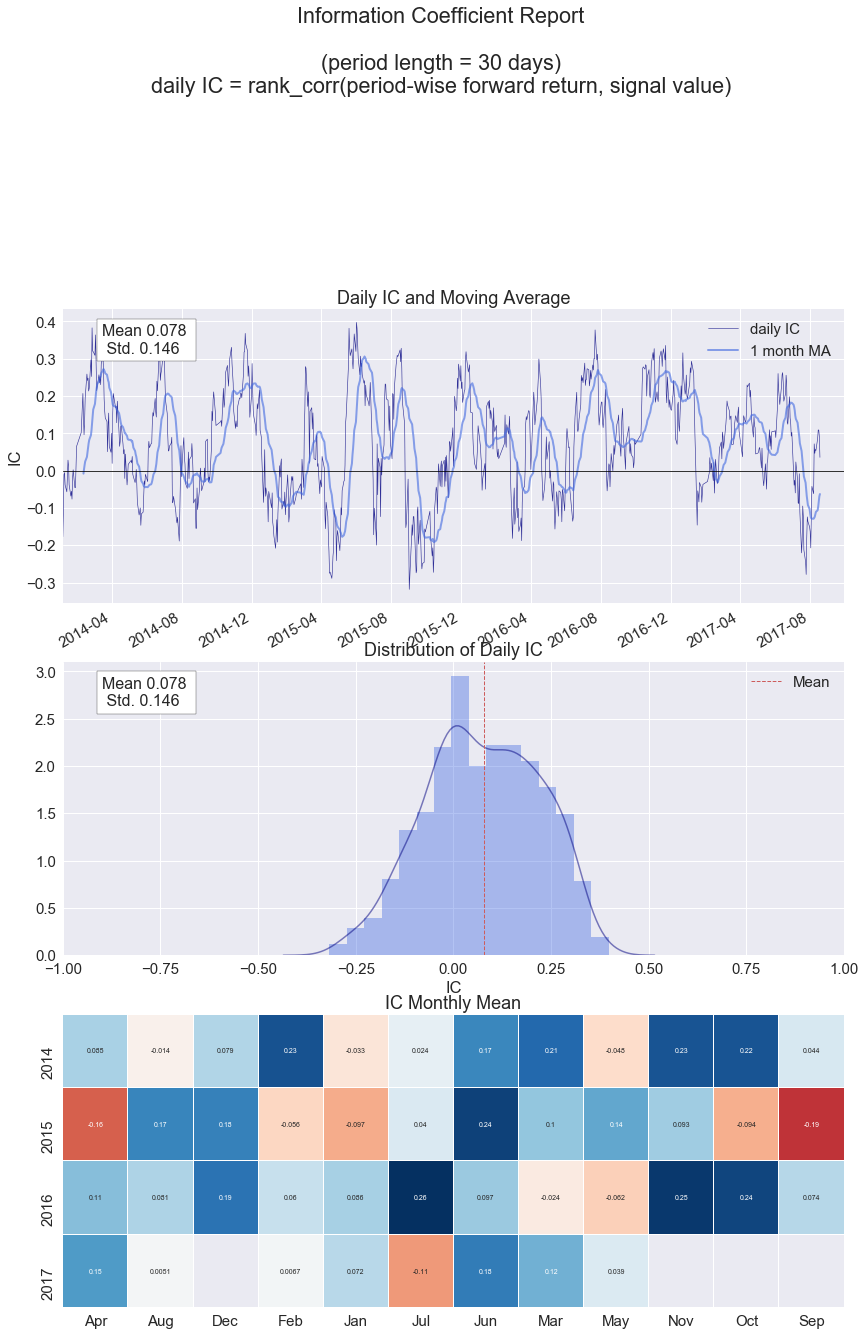

In [9]:
# 并集绩效 绝对收益
draw_analysis('Union',None)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret
t-stat        17.205128       10.291230
p-value        0.000000        0.000000
skewness       1.953364        1.098247
kurtosis      13.206266        4.871784
Ann. Ret       0.129148        0.144236
Ann. Vol       0.267417        0.149024
Ann. IR        0.482945        0.967870
occurance  10239.000000      913.000000, 'space':                     long_space
Ann. Up_sp Ret        0.926904
Ann. Up_sp Vol        0.360132
Ann. Up_sp IR         2.573787
Up_sp Pct5            0.000000
Up_sp Pct25           0.033723
Up_sp Pct50           0.078785
Up_sp Pct75           0.151580
Up_sp Pct95           0.357847
Up_sp Occur       10239.000000
Ann. Down_sp Ret     -0.471826
Ann. Down_sp Vol      0.193993
Ann. Down_sp IR      -2.432184
Down_sp Pct5         -0.214340
Down_sp Pct25        -0.074874
Down_sp Pct50        -0.035603
Down_sp Pct75        -0.013498
Down_sp Pct95         0

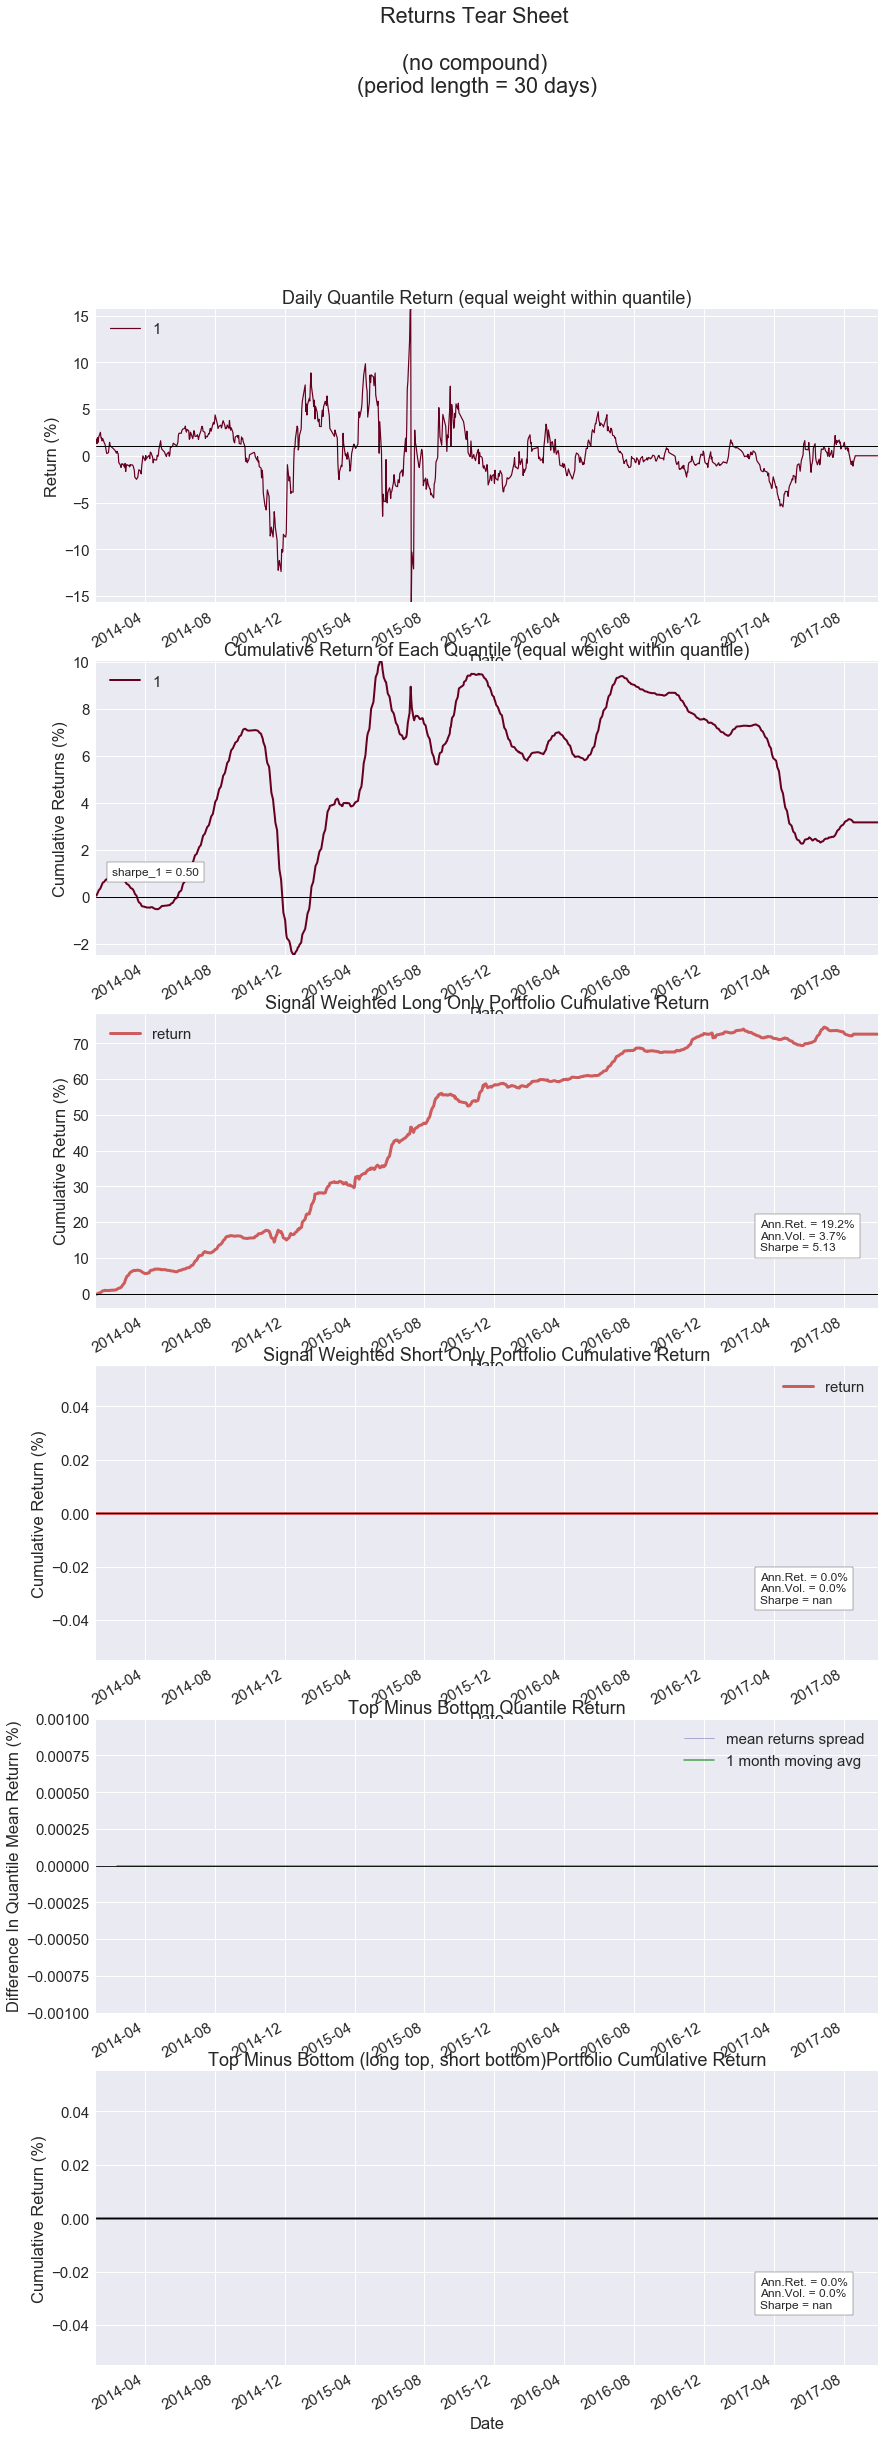

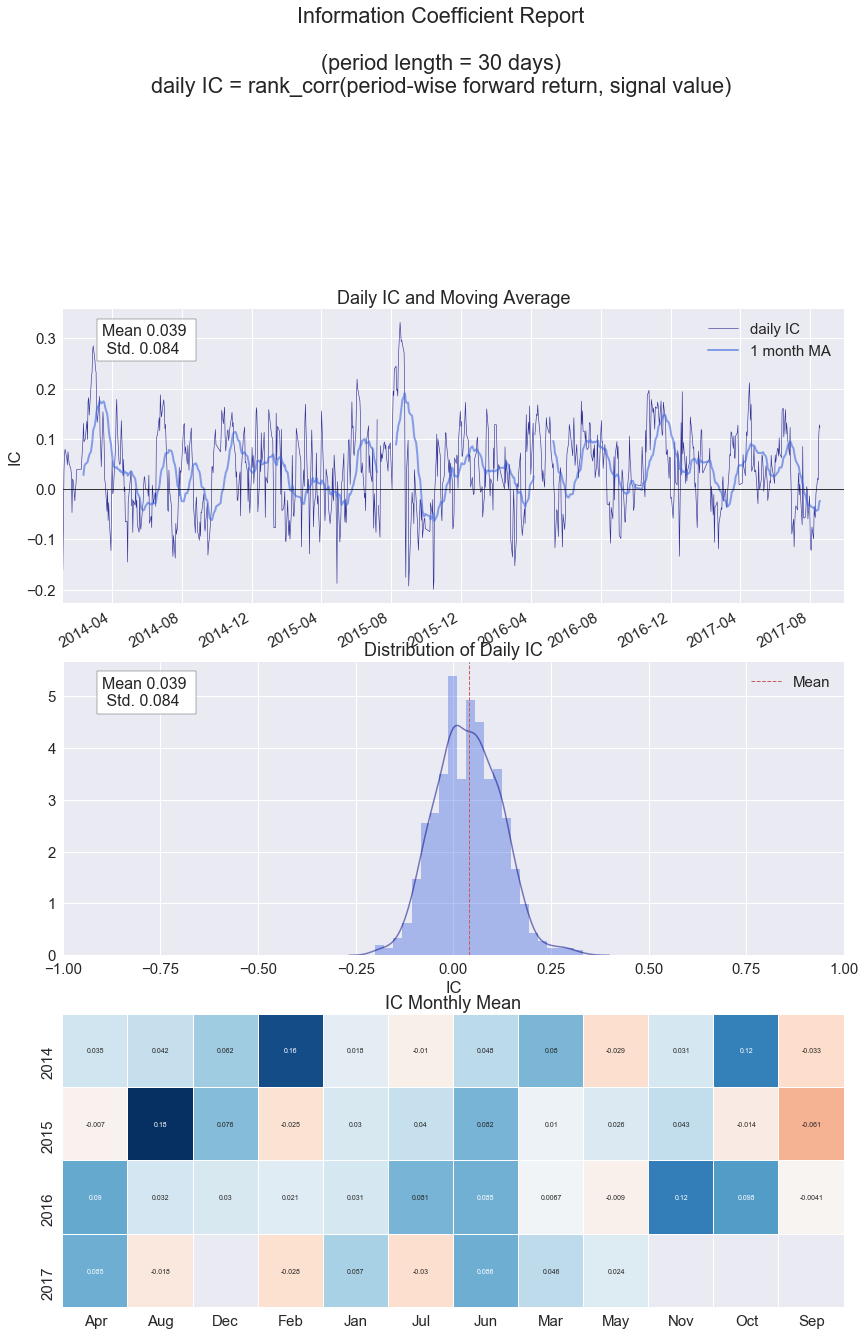

In [10]:
# 交集绩效 相对收益
draw_analysis('Intersection',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret
t-stat        31.496623       11.181172
p-value        0.000000        0.000000
skewness       1.730887        0.524239
kurtosis       9.847581        2.813974
Ann. Ret       0.324531        0.330959
Ann. Vol       0.367073        0.314730
Ann. IR        0.884104        1.051567
occurance  10239.000000      913.000000, 'space':                     long_space
Ann. Up_sp Ret        0.926904
Ann. Up_sp Vol        0.360132
Ann. Up_sp IR         2.573787
Up_sp Pct5            0.000000
Up_sp Pct25           0.033723
Up_sp Pct50           0.078785
Up_sp Pct75           0.151580
Up_sp Pct95           0.357847
Up_sp Occur       10239.000000
Ann. Down_sp Ret     -0.471826
Ann. Down_sp Vol      0.193993
Ann. Down_sp IR      -2.432184
Down_sp Pct5         -0.214340
Down_sp Pct25        -0.074874
Down_sp Pct50        -0.035603
Down_sp Pct75        -0.013498
Down_sp Pct95         0

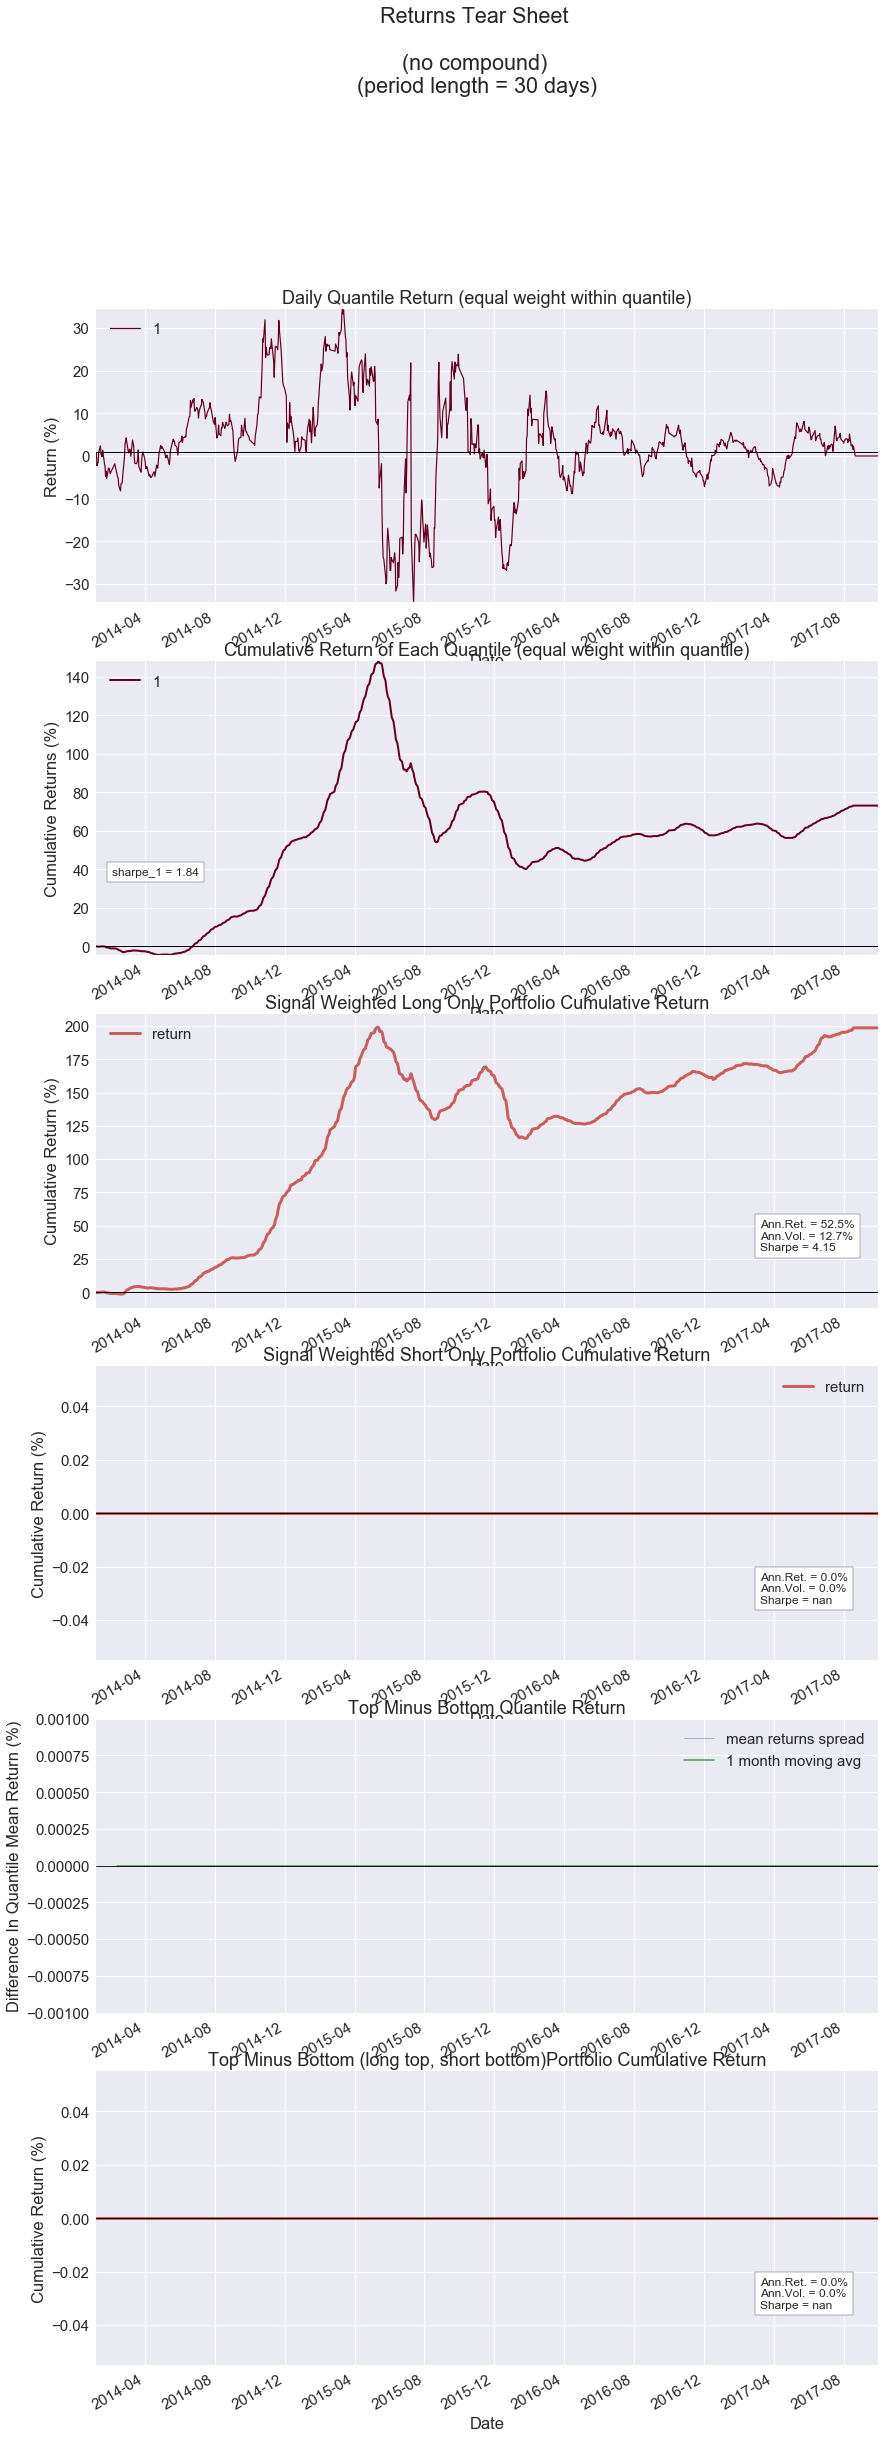

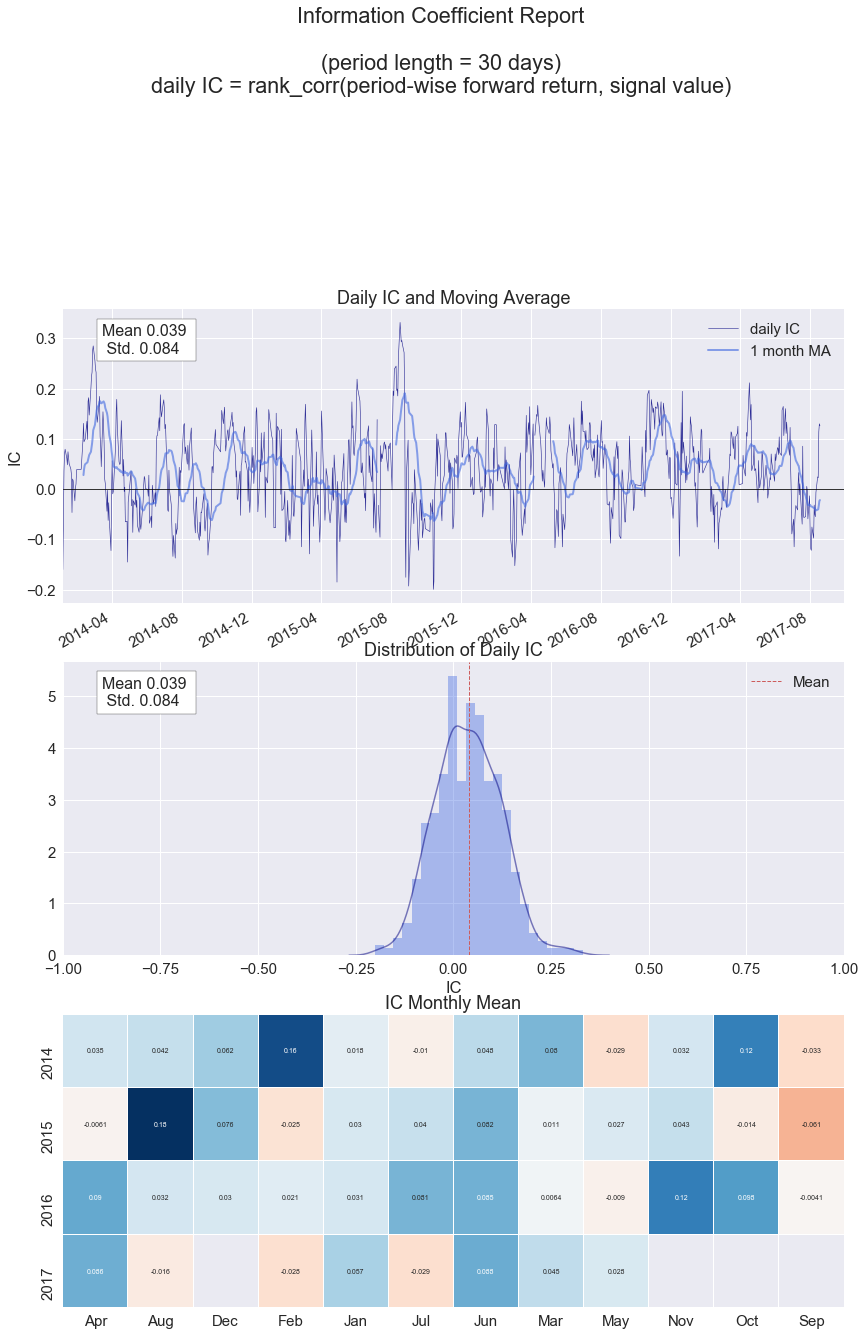

In [11]:
# 交集绩效 绝对收益
draw_analysis('Intersection',None)

In [12]:
Intersection.to_excel('./Intersection.xlsx')
Union.to_excel('./Union.xlsx')